In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Part A)

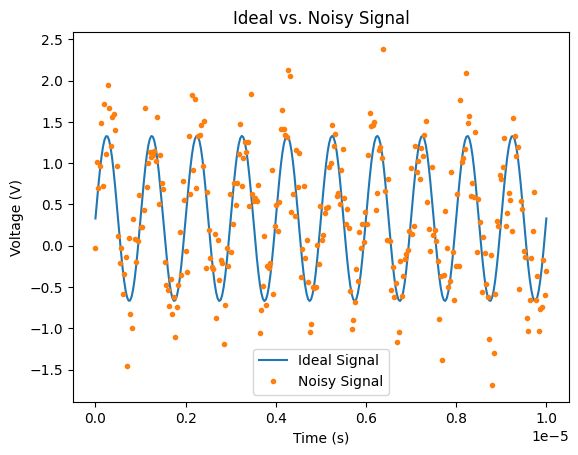

In [79]:
omega = 2 * np.pi * 1e6 # [MHz]
time_end = 10e-6 # [s]
num_points = 300 
std_dev = 0.5 # [V]

t = np.linspace(0, time_end, num_points)

# voltage measured by oscilloscope
V_ideal = np.sin(omega * t) + 0.33

# add gaussian distributed amplitude noise
noise = np.random.normal(0, std_dev, num_points)
V_noisy = V_ideal + noise

plt.plot(t, V_ideal, label='Ideal Signal')
plt.plot(t, V_noisy, 'o', markersize=3, label='Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Ideal vs. Noisy Signal')
plt.legend()
plt.show()


Part B)

In [80]:
def model_func(t, B):
    return np.sin(omega * t) + B

popt, pcov = curve_fit(model_func, t, V_noisy)

B_fit = popt[0]

std_dev_B_fit = np.sqrt(np.diag(pcov))[0]

print("Fit:")
print(f"B = {B_fit:.2f}")
print(f"std dev = {std_dev_B_fit:.2f}")

print("Expected:")
print(f"B = 0.33")

# standard error of the mean (SEM) based on the given values
expected_std_dev = std_dev / np.sqrt(num_points)
print(f"std dev = {expected_std_dev:.2}")

Fit:
B = 0.34
std dev = 0.03
Expected:
B = 0.33
std dev = 0.029


Part C)

In [81]:
print(f"SEM = {expected_std_dev:.2}")
print(f"Std dev = {std_dev_B_fit:.2f}")

SEM = 0.029
Std dev = 0.03


These results are very similar.  The least squares fitting of the curve_fit accounts for the scatter in the data caused by noise, resulting in an uncertainty which aligns with the SEM even though the noise level was never explicitly provided to the fitting algorithm. 

Part D)

In [89]:
def model_func_v2(t, A, f, B):
    return A * np.sin(2 * np.pi * f * t) + B

initial_guesses = [1, 1e6, 0.33]

popt_v2, pcov_v2 = curve_fit(model_func_v2, t, V_noisy, p0=initial_guesses)

A_fit, f_fit, B_fit_v2 = popt_v2

std_dev_fit_v2 = np.sqrt(np.diag(pcov_v2))

print("Fitted params:")
print(f"A = {A_fit:.2f} +/- {std_dev_fit_v2[0]:.2f}")
print(f"f = {f_fit:.2f} +/- {std_dev_fit_v2[1]:.2f}")
print(f"B = {B_fit_v2:.2f} +/- {std_dev_fit_v2[2]:.2f}")
print("Expected:")
print(f"A = 1")
print(f"f = 1e6")
print(f"B = 0.33")

# for a confidence of 95%
z_score = 1.96
confidence_interval_A_upper = A_fit + z_score * std_dev_fit_v2[0]
confidence_interval_A_lower = A_fit - z_score * std_dev_fit_v2[0]
confidence_interval_A = (confidence_interval_A_lower, confidence_interval_A_upper)

confidence_interval_f_upper = f_fit + z_score * std_dev_fit_v2[1]
confidence_interval_f_lower = f_fit - z_score * std_dev_fit_v2[1]
confidence_interval_f = (confidence_interval_f_lower, confidence_interval_f_upper)

confidence_interval_B_upper = B_fit + z_score * std_dev_fit_v2[2]
confidence_interval_B_lower = B_fit - z_score * std_dev_fit_v2[2]
confidence_interval_B = (confidence_interval_B_lower, confidence_interval_B_upper)

print(f"Confidence Interval of A: {confidence_interval_A}")
print(f"Confidence Interval of f: {confidence_interval_f}")
print(f"Confidence Interval of B: {confidence_interval_B}")




Fitted params:
A = 0.91 +/- 0.04
f = 1000430.05 +/- 1166.24
B = 0.34 +/- 0.03
Expected:
A = 1
f = 1e6
B = 0.33
Confidence Interval of A: (0.8342386534626529, 0.9860903741331541)
Confidence Interval of f: (998144.2137828998, 1002715.883870183)
Confidence Interval of B: (0.2885326126229213, 0.395698322002462)


We see the frequency f and offset B is within the 95% confidence interval, but the amplitude A here is not within the confidence interval. 

Part E)

In [50]:
cov_A_f = pcov_v2[0, 1]
cov_A_B = pcov_v2[0, 2]
cov_f_B = pcov_v2[1, 2]
print(f"Covar(A,f) = {cov_A_f:.3}")
print(f"Covar(A,B) = {cov_A_B:.3f}")
print(f"Covar(f,B) = {cov_f_B:.3f}")



Covar(A,f) = 0.564
Covar(A,B) = 0.000
Covar(f,B) = -0.086


A and f: Positive covariance indicates there as one parameter increases, the other parameter tends to increase as well. This is the case between A and f, due to the fact that amplitude and frequency both contribute to the shape and position of the sine wave. 

A and B: Negligible covariance between A and B shows that these are independant and there is no meaningful relationship.

B and f: Negative Covariance means that if one parameter increases, the other tends to decrease. Changes in frequnecy might shift the alignment of the sine wave which would be counteracted by adjusting the offset B. 

Part F)

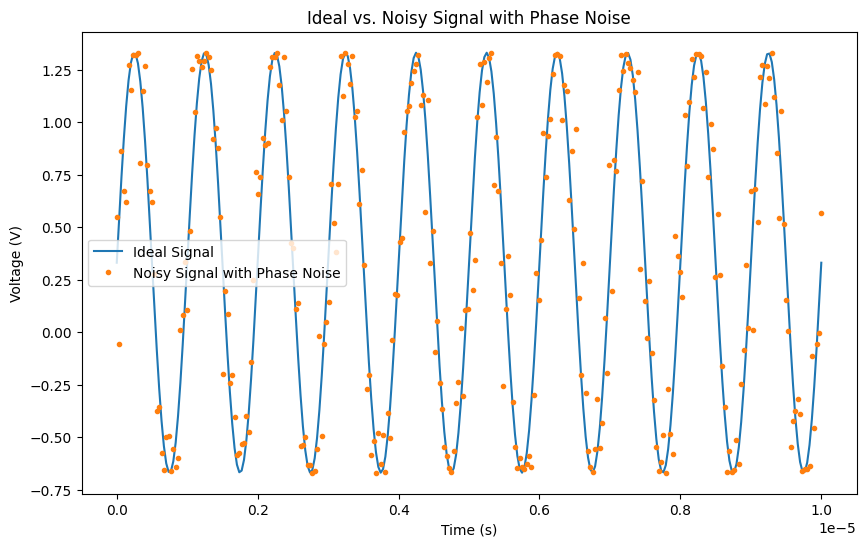

Fitted params:
A = 0.95 +/- 0.02
f = 1000112.92 +/- 489.46
B = 0.34 +/- 0.01
Expected:
A = 1
f = 1e6
B = 0.33

Covar(A,f) = 0.112
Covar(A,B) = -0.000
Covar(f,B) = -0.026


In [111]:
phase_noise_std = np.pi/10

# noise = guassian, mean = 0, std = pi/10
phase_noise = np.random.normal(0, phase_noise_std, num_points)

V_phase_noisy = np.sin(omega * t + phase_noise) + 0.33

plt.figure(figsize=(10, 6))
plt.plot(t, V_ideal, label='Ideal Signal')
plt.plot(t, V_phase_noisy, 'o', markersize=3, label='Noisy Signal with Phase Noise')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Ideal vs. Noisy Signal with Phase Noise')
plt.legend()
plt.show()

popt_phase, pcov_phase = curve_fit(model_func_v2, t, V_phase_noisy, p0=initial_guesses)

A_fit_phase, f_fit_phase, B_fit_phase = popt_phase

std_dev_fit_phase = np.sqrt(np.diag(pcov_phase))

cov_A_f_phase = pcov_phase[0, 1]
cov_A_B_phase = pcov_phase[0, 2]
cov_f_B_phase = pcov_phase[1, 2]


print("Fitted params:")
print(f"A = {A_fit_phase:.2f} +/- {std_dev_fit_phase[0]:.2f}")
print(f"f = {f_fit_phase:.2f} +/- {std_dev_fit_phase[1]:.2f}")
print(f"B = {B_fit_phase:.2f} +/- {std_dev_fit_phase[2]:.2f}")
print("Expected:")
print(f"A = 1")
print(f"f = 1e6")
print(f"B = 0.33\n")

print(f"Covar(A,f) = {cov_A_f_phase:.3}")
print(f"Covar(A,B) = {cov_A_B_phase:.3f}")
print(f"Covar(f,B) = {cov_f_B_phase:.3f}")



Comparing phase noise to amplitude noise, we would expect that phase noise has less accuracy in frequency, and more accuracy in amplitude and offset, however we cannot tell from these results as they both fall within similar ranges.

We can see that these values are more precise with a smaller std dev, however they not are necessarily as accurate. 

We see the signs remain the same for the covariances between the parameters, however they are smaller in size. This is phase noise gives us better precision so the model can fit the data more closely. 

In [112]:
# for a confidence of 95%
z_score = 1.96
confidence_interval_A_upper_phase = A_fit_phase + z_score * std_dev_fit_phase[0]
confidence_interval_A_lower_phase = A_fit_phase - z_score * std_dev_fit_phase[0]
confidence_interval_A_phase = (confidence_interval_A_lower_phase, confidence_interval_A_upper_phase)

confidence_interval_f_upper_phase = f_fit_phase + z_score * std_dev_fit_phase[1]
confidence_interval_f_lower_phase = f_fit_phase - z_score * std_dev_fit_phase[1]
confidence_interval_f_phase = (confidence_interval_f_lower_phase, confidence_interval_f_upper_phase)

confidence_interval_B_upper_phase = B_fit_phase + z_score * std_dev_fit_phase[2]
confidence_interval_B_lower_phase = B_fit_phase - z_score * std_dev_fit_phase[2]
confidence_interval_B_phase = (confidence_interval_B_lower_phase, confidence_interval_B_upper_phase)

print(f"Confidence Interval of A: {confidence_interval_A_phase}")
print(f"Confidence Interval of f: {confidence_interval_f_phase}")
print(f"Confidence Interval of B: {confidence_interval_B_phase}")

Confidence Interval of A: (0.9192870799466418, 0.9859506843585463)
Confidence Interval of f: (999153.5687462157, 1001072.2677870772)
Confidence Interval of B: (0.3129791661816087, 0.36003238954349814)
